In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = '../../../Data/2026/260115_vanillin+UV_20C/'
SMPS = import_SMPS(f'{path}SMPS/', '', 0)
save_path = 'Figures/260115_vanillin+UV_dry/'
timestamps = [['2026-01-15 09:49', '2026-01-15 17:10']]

for key in SMPS.keys():
    SMPS[key].rename(columns = {SMPS[key].keys()[38]:'Total concentration'}, inplace = True)
AMS = import_data(f'{path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
for key in AMS.keys():            
    AMS[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'Ratio_H_C', 'Ratio_O_C', 
                        'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH', 'f43', 'f44', 'Time']

mask = AMS['260115_AMS_vanillin+UV_TS']['HROrg'] != 0
AMS['260115_AMS_vanillin+UV_TS'] = AMS['260115_AMS_vanillin+UV_TS'][mask]

(0.0, 3.5)

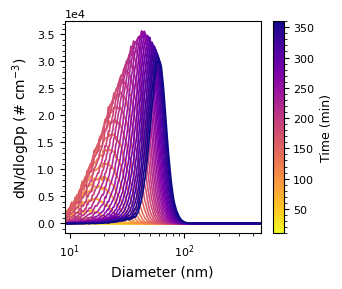

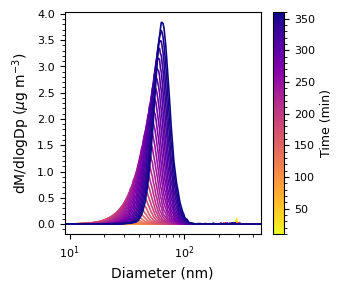

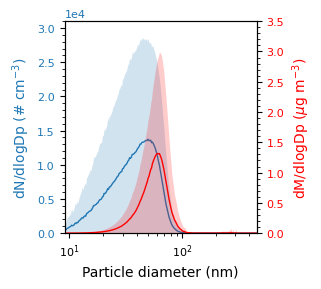

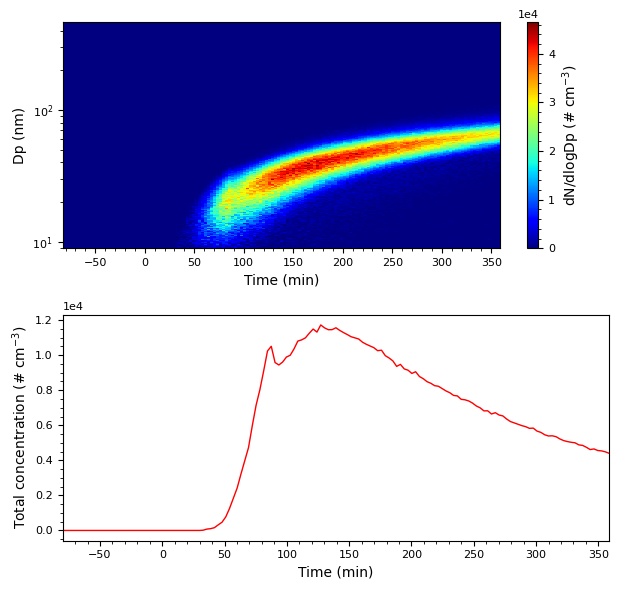

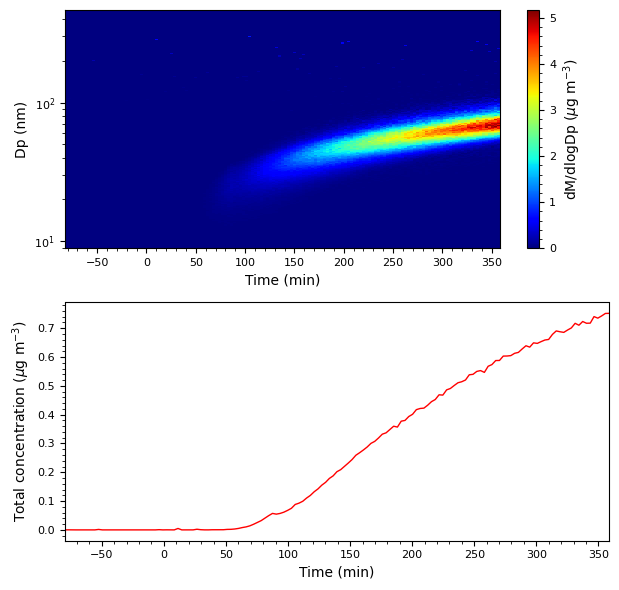

In [3]:
SMPS_keys = [['260115-vanillin+UV_number'], ['260115-vanillin+UV_mass']]
ax, ax_2 = plot_SMPS(SMPS, SMPS_keys, SMPS['260115-vanillin+UV_mass'].keys()[42:-1], 8.90, 'number and mass', timestamps, 10, 
                     'Total concentration', '2026-01-15 11:10', 1, 1, save_path)
ax[0].set_ylim(0, 3.1*10**4)
ax_2[0].set_ylim(0, 3.5)

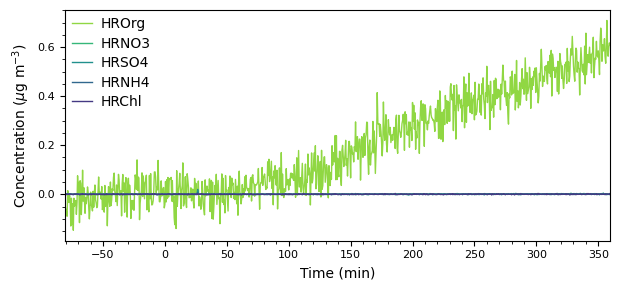

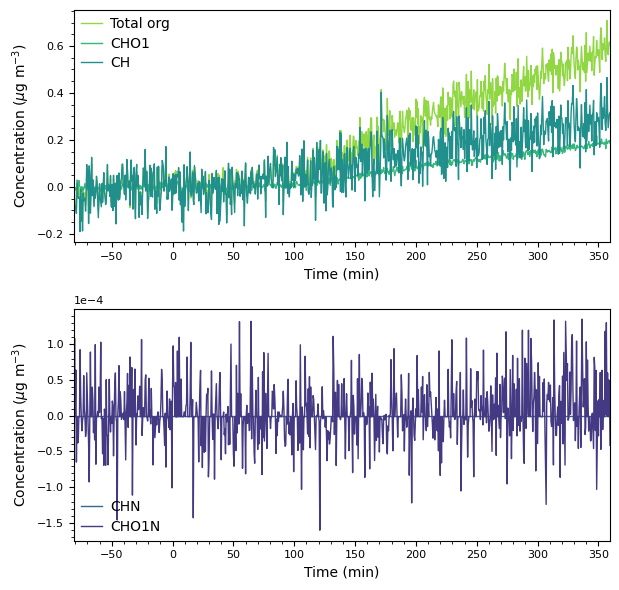

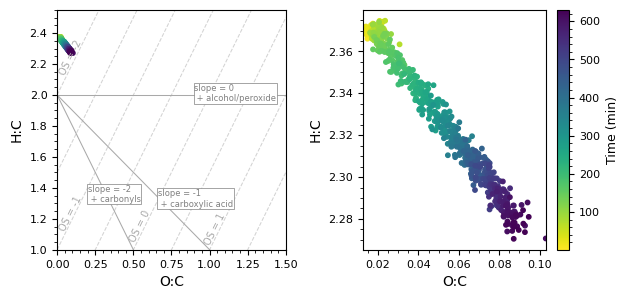

In [4]:
bg_timestamps = ['2026-01-15 09:32', '2026-01-15 09:48']
plot_AMS(AMS['260115_AMS_vanillin+UV_TS'], None, '2026-01-15 11:10', timestamps[0], bg_timestamps, 1, save_path)